##### Based on https://www.kaggle.com/dhruvanurag20/brain-tumor-classification-multi-label-cnn/data#Import-OS

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
im_fol = os.path.join("D:/Users/James/Documents/Jupyter Saves/University/7088CEM/archive/")

In [14]:
im_fol = os.path.join("D:/Users/James/Documents/Jupyter Saves/University/7088CEM/archive/")
tum_types = ["no_tumor", "meningioma_tumor", "pituitary_tumor", "glioma_tumor"]

# Training Data
for ty in tum_types:
    ty_fol = os.path.join(im_fol, "Training", ty)
    for file in os.listdir(ty_fol):
        im_path = os.path.join(ty_fol, file)
        im = cv2.imread(im_path)

#im = cv2.resize(im, (512,512))        



training = []

for ty in tum_types:
    ty_fol = os.path.join(im_fol, "Training", ty)
    tum_num = tum_types.index(ty)
    for file in os.listdir(ty_fol):
        image_arr = cv2.imread(os.path.join(ty_fol, file), cv2.IMREAD_GRAYSCALE)
        new_image_array = cv2.resize(image_arr, (128, 128))
        training.append([new_image_array, tum_num])

        
        
        
# Testing Data
testing = []

for ty in tum_types:
    ty_fol = os.path.join(im_fol, "Testing", ty)
    tum_num = tum_types.index(ty)
    for file in os.listdir(ty_fol):
        image_arr = cv2.imread(os.path.join(ty_fol, file), cv2.IMREAD_GRAYSCALE)
        new_image_array = cv2.resize(image_arr, (128, 128))
        testing.append([new_image_array, tum_num])

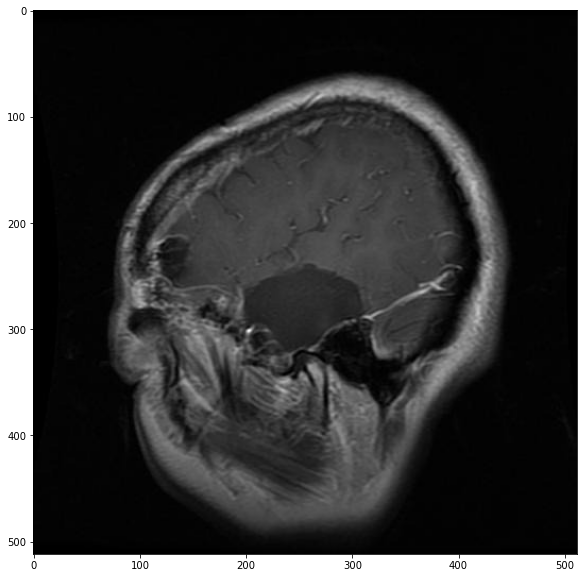

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(im)

In [17]:
# Training
x_train = []
y_train = []

for i, j in training:
    x_train.append(i)
    y_train.append(j)
    
x_train = np.array(x_train).reshape(-1, 128, 128)
print(x_train.shape)

x_train = x_train/255
x_train = x_train.reshape(-1, 128, 128, 1)



# Validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size = 0.1, random_state = 123)



# Testing
x_test = []
y_test = []

for i, j in testing:
    x_test.append(i)
    y_test.append(j)

x_test = np.array(x_test).reshape(-1, 128, 128)
print(x_test.shape)

x_test = x_test/255
x_test = x_test.reshape(-1, 128, 128, 1)

(2870, 128, 128)
(394, 128, 128)


In [18]:
from keras.utils.np_utils import to_categorical   

y_train_enc = to_categorical(y_train, num_classes = 4)
y_val_enc = to_categorical(y_val, num_classes = 4)
y_test_enc = to_categorical(y_test, num_classes = 4)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from keras.layers.normalization import BatchNormalization

In [65]:
#Conv2d as image is greyscale (3D would be required for RGB)
# my CNN architechture is In -> [Conv2D-> Normalise -> MaxPool2D -> Dropout]*5 -> Flatten -> Normalise -> Dense -> Dropout -> Normalise -> Dense -> Out


model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (128,128,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))

model.add(BatchNormalization())
# Softmax output equivalent to probability distribution
model.add(Dense(4, activation = "softmax"))

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

epochs = 30

es = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience = 3
)

batch_size = 32

# Data Augmentation parameters
imggen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 128, 128, 64)      1664      
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 64, 64, 128)       204928    
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 128)       512       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 32, 32, 128)      

In [67]:
imggen.fit(x_train)

# ~70%
history = model.fit(x_train, y_train_enc, epochs=epochs)


#history = model.fit(imggen.flow(x_train, y_train_enc, batch_size = batch_size),
#                              epochs = epochs, validation_data = (x_val, y_val_enc),
#                              steps_per_epoch = x_train.shape[0] // batch_size,
#                              callbacks = [es])

#history = model.fit_generator(imggen.flow(x_train, y_train_enc, batch_size = batch_size),
#                              epochs = epochs, validation_data = (x_val, y_val_enc),
#                              steps_per_epoch = x_train.shape[0] // batch_size,
#                              callbacks = [es])

Epoch 1/30
81/81 [==============================] - 133s 2s/step - loss: 1.2514 - accuracy: 0.5487
Epoch 2/30
81/81 [==============================] - 132s 2s/step - loss: 0.7233 - accuracy: 0.7220
Epoch 3/30
81/81 [==============================] - 133s 2s/step - loss: 0.5640 - accuracy: 0.7881
Epoch 4/30
81/81 [==============================] - 132s 2s/step - loss: 0.5344 - accuracy: 0.7882
Epoch 5/30
81/81 [==============================] - 132s 2s/step - loss: 0.4121 - accuracy: 0.8371
Epoch 6/30
81/81 [==============================] - 132s 2s/step - loss: 0.3414 - accuracy: 0.8662
Epoch 7/30
81/81 [==============================] - 132s 2s/step - loss: 0.3012 - accuracy: 0.8737
Epoch 8/30
81/81 [==============================] - 132s 2s/step - loss: 0.2536 - accuracy: 0.9096
Epoch 9/30
81/81 [==============================] - 131s 2s/step - loss: 0.2339 - accuracy: 0.9147
Epoch 10/30
81/81 [==============================] - 132s 2s/step - loss: 0.1841 - accuracy: 0.9318
Epoch 11/

### Accuracy Scores

In [70]:
score = model.evaluate(x_train, y_train_enc)
score

81/81 [==============================] - 21s 256ms/step - loss: 0.0056 - accuracy: 0.9996


[0.005628897808492184, 0.9996128678321838]

In [71]:
score = model.evaluate(x_val, y_val_enc)
score

9/9 [==============================] - 2s 259ms/step - loss: 0.1241 - accuracy: 0.9582


[0.12409354001283646, 0.9581881761550903]

In [72]:
score = model.evaluate(x_test, y_test_enc)
score

13/13 [==============================] - 3s 246ms/step - loss: 3.1317 - accuracy: 0.7157


[3.1317262649536133, 0.7157360315322876]

### Confusion Matrices

In [73]:
#https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 45)
#    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 30)
    plt.yticks(tick_marks, classes, rotation=45, fontsize = 30)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 45,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize = 45)
    plt.xlabel('Predicted label', fontsize = 45)
    plt.tight_layout()
    plt.grid(False)

### Test Data Con Mat

Confusion matrix, without normalization
[[105   0   0   0]
 [  6 107   1   1]
 [ 12  10  52   0]
 [ 56  22   4  18]]


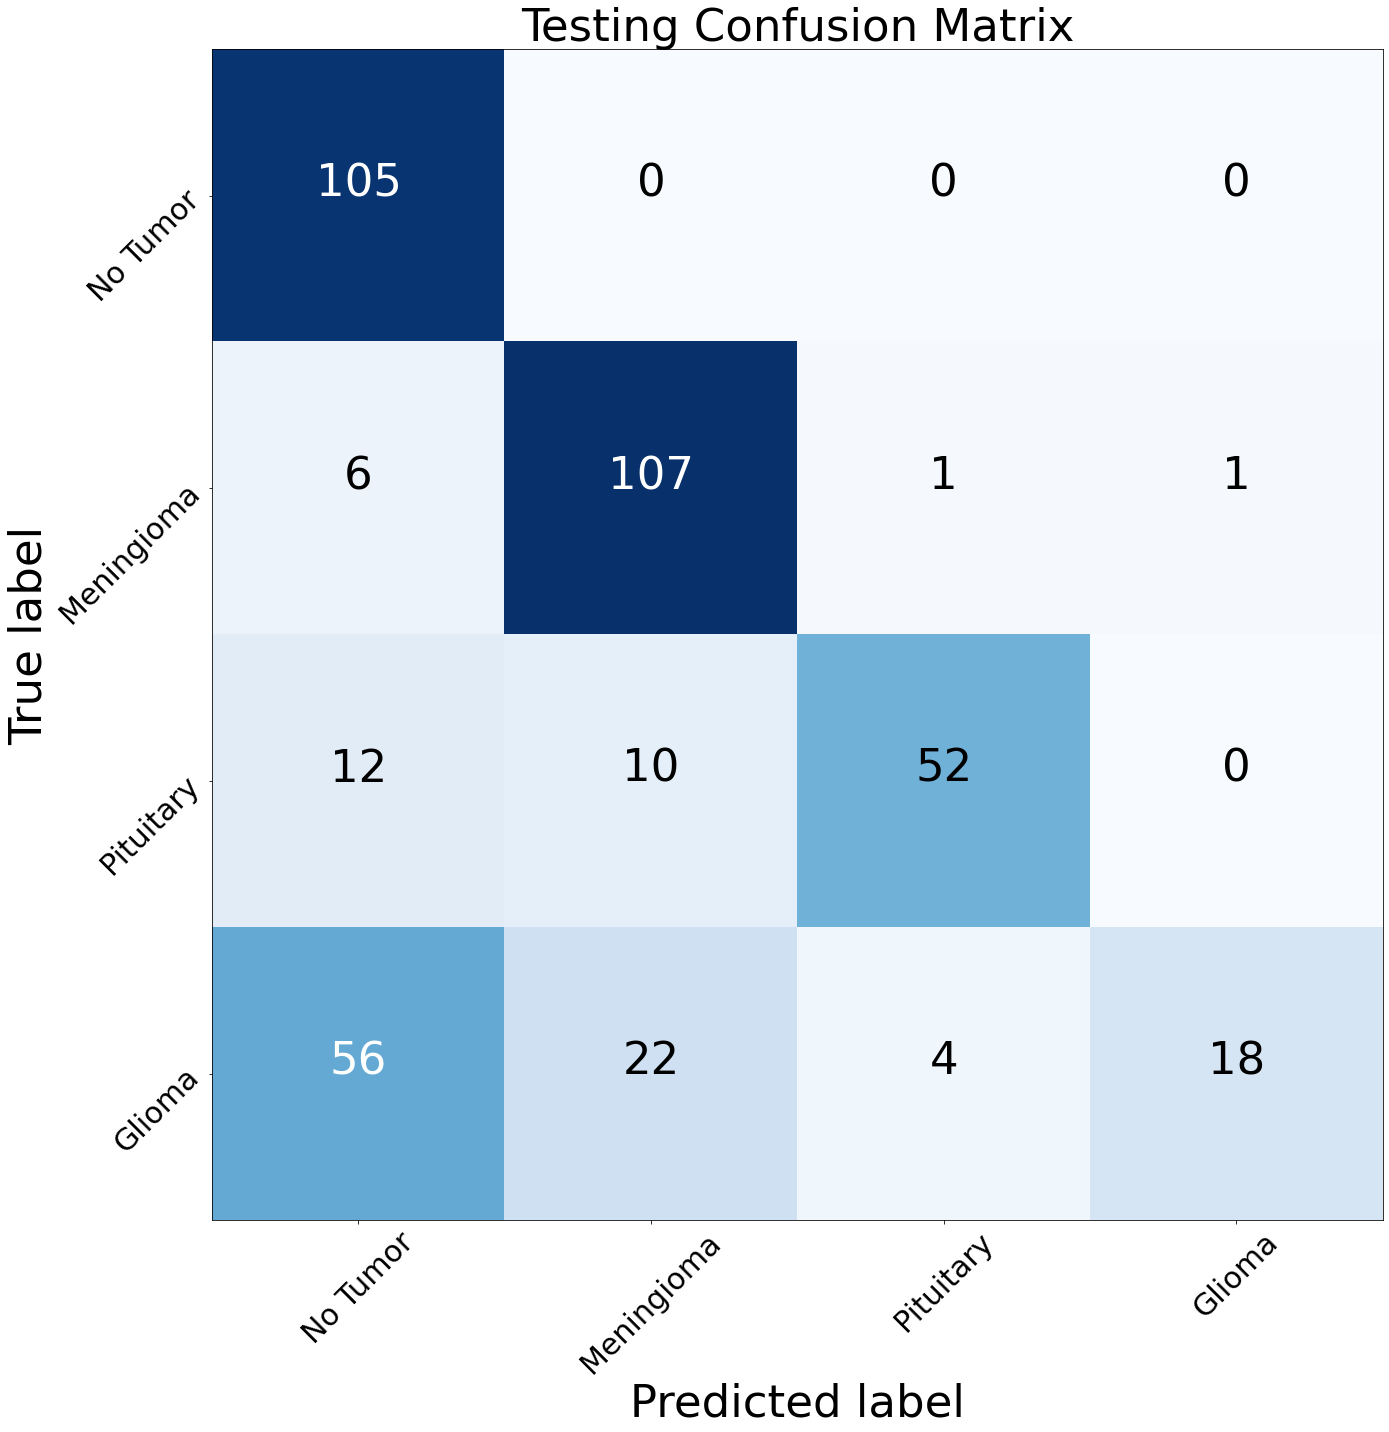

In [74]:
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

test_con_mat = confusion_matrix(y_test, y_test_pred_classes)


np.set_printoptions(precision=2)
plt.figure(figsize = (20,20))
plot_confusion_matrix(test_con_mat, classes = ["No Tumor", "Meningioma", "Pituitary", "Glioma"], title='Testing Confusion Matrix')

### Val Data Con Mat

In [ ]:
y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

In [ ]:
val_con_mat = confusion_matrix(y_val, y_val_pred_classes)

In [ ]:
np.set_printoptions(precision=2)
plt.figure(figsize = (20,20))
plot_confusion_matrix(val_con_mat, classes = ["No Tumor", "Meningioma", "Pituitary", "Glioma"], title='Validation Confusion Matrix')